# Analyse des temps de parole (Work in progress)

In [1]:
#import bibliotheque de fonction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fonction.perso_stats as perso_stats

In [2]:
#import donnée
leg2024 = pd.read_csv('donnee_contruite/temps_paroles_leg2024.csv')

In [3]:
#style graphique
sns.set_style('whitegrid')

Vue générale :<br>
20 % des interventions sur toute les chaines font 80% des temps de paroles.<br>
Il y a un indice de gini de 0.83 ce qui correspond à une grande inégalité du temps de paroles<br>

indice de gini general : 0.7454090238185148


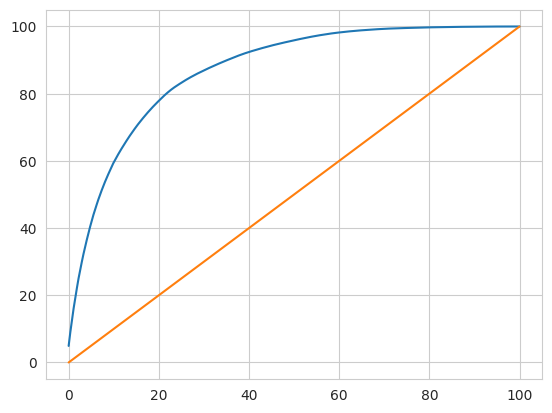

In [4]:
fig,ax =plt.subplots()
print('indice de gini general :',perso_stats.courbe_Lorentz(plt_ax=ax,df=leg2024,colonne='Durée en seconde'))


## indice de Gini :
Au plus l'espace entre la courbe et la droite est important, au plus la situation est inégalitaire.<br>


In [5]:
liste_media = list(leg2024['Nom du media'].unique())
liste_type_media = list(leg2024['Type de media'].unique())

indice de gini TV généraliste: 0.7070592315232905
indice de gini inconnu: 0.6869471991423208
indice de gini radio: 0.6952227779509521
indice de gini TV info continue: 0.6384947051977222


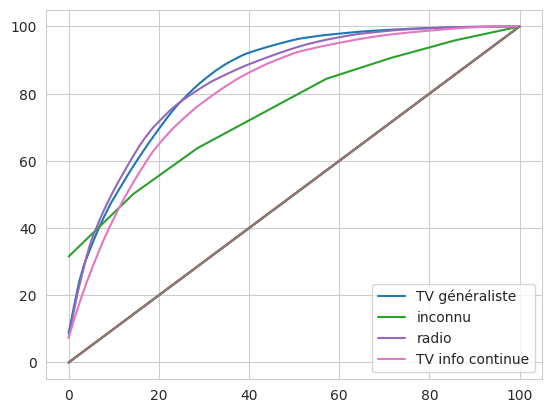

In [6]:
fig,ax =plt.subplots()
for type in liste_type_media:
    data=leg2024[leg2024['Type de media']==type]
    print('indice de gini '+type+':',perso_stats.courbe_Lorentz(plt_ax=ax,df=data,colonne='Durée en seconde',label=type))
    ax.legend()


Les radios fournissent en général plus d'égalité du temps de parole.<br>
Enfin juste un peu<br>

In [7]:
liste_media

['France3',
 'C8',
 'TV5Monde',
 'RadioClassique',
 'M6',
 'RFI',
 'RMC',
 'France2',
 'France5',
 'RMC-Story',
 'FranceInter',
 'RTL',
 'TMC',
 'FranceCulture',
 'Cnews',
 'Europe1',
 'TF1',
 'LCI',
 'France info TV',
 'FranceInfo',
 'BFMTV',
 'France24']

RMC decouverte et BFM business n ont pas de temps de paroles, division par 0 je dois les enlever

indice de gini BFMTV: 0.71087735471604
indice de gini C8: 1.0325124347931574
indice de gini Cnews: 0.7340637994005694
indice de gini Euronews: -1.0
indice de gini Europe1: 0.877077301270386
indice de gini France2: 0.8642933116436219
indice de gini France24: 0.7726402474501596
indice de gini France3: 1.241470104223807
indice de gini France5: 0.7774514384887523
indice de gini FranceCulture: 0.941045330691107
indice de gini FranceInfo: 0.7056558909725092
indice de gini FranceInter: 0.628362101433313
indice de gini LCI: 0.7123490626950767
indice de gini M6: 0.6397941680960546
indice de gini RFI: 0.6435879467414154
indice de gini RMC-Story: 0.7699920514938516
indice de gini RMC: 0.7848778542914664
indice de gini RTL: 0.6487256194435992
indice de gini RadioClassique: 0.901077199281867
indice de gini SudRadio: -1.0
indice de gini TF1: 0.8543067700835781
indice de gini TMC: 0.914155045733993
indice de gini TV5Monde: 0.6869471991423208
indice de gini France info TV: 0.7256884711036073


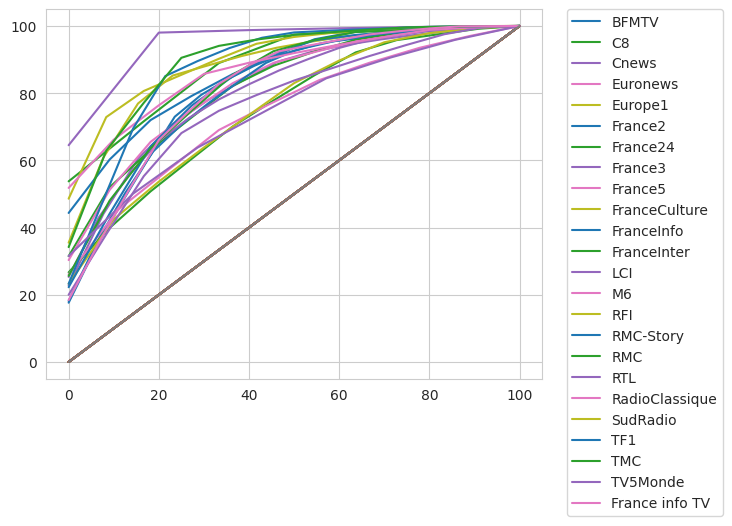

In [8]:
fig,ax =plt.subplots()
# selectionne les media voulu sur le graphe. BFM business et RMC decouverte on des donnée vide provoquant une division par 0
liste_media=[#'BFMBusiness',
 'BFMTV',
 'C8',
 'Cnews',
 'Euronews',
 'Europe1',
 'France2',
 'France24',
 'France3',
 'France5',
 'FranceCulture',
 'FranceInfo',
 'FranceInter',
 'LCI',
 'M6',
 'RFI',
 'RMC-Story',
 'RMC',
 #'RMCDecouverte',
 'RTL',
 'RadioClassique',
 'SudRadio',
 'TF1',
 'TMC',
 'TV5Monde',
 'France info TV'
 ]
 
dico_gini_media = {}
for media in liste_media:
    data=leg2024[leg2024['Nom du media']==media]
    indice = perso_stats.courbe_Lorentz(plt_ax=ax,df=data,colonne='Durée en seconde',label=media)
    print('indice de gini '+media+':',indice)
    dico_gini_media[media] = float(indice)
    ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

# Classement des medias du moins égalitaire au plus égalitaire selon l indice de Gini :

In [9]:
for key in sorted(dico_gini_media, key = dico_gini_media.get, reverse=True) :
    print (key,':', dico_gini_media[key])

France3 : 1.241470104223807
C8 : 1.0325124347931574
FranceCulture : 0.941045330691107
TMC : 0.914155045733993
RadioClassique : 0.901077199281867
Europe1 : 0.877077301270386
France2 : 0.8642933116436219
TF1 : 0.8543067700835781
RMC : 0.7848778542914664
France5 : 0.7774514384887523
France24 : 0.7726402474501596
RMC-Story : 0.7699920514938516
Cnews : 0.7340637994005694
France info TV : 0.7256884711036073
LCI : 0.7123490626950767
BFMTV : 0.71087735471604
FranceInfo : 0.7056558909725092
TV5Monde : 0.6869471991423208
RTL : 0.6487256194435992
RFI : 0.6435879467414154
M6 : 0.6397941680960546
FranceInter : 0.628362101433313
Euronews : -1.0
SudRadio : -1.0


Cette liste est concu avec une regle : chaque liste doit avoir le meme temps de parole. Ainsi une chaine qui lutte contre les autres en mettant en avant une liste peut representative va donc etre classé non égalitaire.<br>

Vue générale :

In [10]:
"""
# preparation data
eu2024_couleur_gen = eu2024.groupby(by='Couleur').agg({'Durée en seconde':'sum'}).reset_index()
eu2024_couleur_gen["Temps de parole en heure"] = eu2024_couleur_gen['Durée en seconde']/3600
eu2024_couleur_gen = eu2024_couleur_gen.sort_values(by='Temps de parole en heure',ascending=False)

# couleurs
# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs
colors = ["#0D378A", "#ffeb00","#bb1840","#ff8080","#0066cc","#00c000","#FF00FF","#eeeeee"]
sns.set_palette(sns.color_palette(colors))

# figure 
fig,ax =plt.subplots()
sns.barplot(data=eu2024_couleur_gen,x='Couleur',y='Temps de parole en heure',hue='Couleur')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Etiquette politique")
ax.set_title("Temps de parole tout media confondu")
plt.show() """


'\n# preparation data\neu2024_couleur_gen = eu2024.groupby(by=\'Couleur\').agg({\'Durée en seconde\':\'sum\'}).reset_index()\neu2024_couleur_gen["Temps de parole en heure"] = eu2024_couleur_gen[\'Durée en seconde\']/3600\neu2024_couleur_gen = eu2024_couleur_gen.sort_values(by=\'Temps de parole en heure\',ascending=False)\n\n# couleurs\n# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs\ncolors = ["#0D378A", "#ffeb00","#bb1840","#ff8080","#0066cc","#00c000","#FF00FF","#eeeeee"]\nsns.set_palette(sns.color_palette(colors))\n\n# figure \nfig,ax =plt.subplots()\nsns.barplot(data=eu2024_couleur_gen,x=\'Couleur\',y=\'Temps de parole en heure\',hue=\'Couleur\')\nax.tick_params(axis=\'x\', labelrotation=90)\nax.set_xlabel("Etiquette politique")\nax.set_title("Temps de parole tout media confondu")\nplt.show() '

Bon selon l'indice de Gini, et les graphiques, le temps de paroles n'est pas égalitaire.<br>
En effet, pour assurer le pluralisme politique, l'arcom applique une regle d'èquité du temps de paroles.<br>
Les temps de paroles sont donc autorisé en fonction de :
<ul>
    <li>des résultats des élections précedentes</li>
    <li>des sondages</li>
    <li>de l'actualité</li>
</ul>

source :
https://www.csa.fr/Reguler/Espace-juridique/Les-textes-adoptes-par-l-Arcom/Les-deliberations-et-recommandations-de-l-Arcom/Recommandations-et-deliberations-du-CSA-relatives-a-d-autres-sujets/Deliberation-n-2017-62-du-22-novembre-2017-relative-au-principe-de-pluralisme-politique-dans-les-services-de-radio-et-de-television

Pour ces élections, l'extreme-droite à eu plus de 60 heures de temps de paroles.<br>
Si on suis la logique de l'arcom, le RN étant en tête des sondages, c'est légal.<br>
https://www.lesechos.fr/elections/europeennes/sondage-europeennes-2024-tous-les-resultats-du-barometre-eurotrack-2090451 <br>
<br>
Par contre, il faut aussi prendre ne compte les résultats des précédentes élections.<br>
https://fr.wikipedia.org/wiki/%C3%89lections_europ%C3%A9ennes_de_2019_en_France <br>
<br>
Et aussi l'actualité pendant les élections.<br>


In [11]:
"""
# preparation data
eu2024_sort = eu2024.sort_values(by="Temps total",ascending=False)

# couleurs
# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs
colors = {"Extreme droite - Divers":"#0D378A"
        ,"Centriste et Liberaux":"#ffeb00"
        ,"gauche radicale":"#bb1840"
        ,"Sociaux Democrate":"#ff8080"
        ,"Les conservateurs":"#0066cc"
        ,"Ecologiste et Regionaliste":"#00c000"
        ,"Macron parle":"#FF00FF"
        ,"Autres":"#eeeeee"}

# figure 
fig,ax =plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=eu2024_sort,x='Nom du media',y='Durée en heure',hue='Couleur',palette=colors,errorbar=None,estimator='sum')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Etiquette politique")
ax.set_title("Temps de parole tout media confondu")
plt.show() """

'\n# preparation data\neu2024_sort = eu2024.sort_values(by="Temps total",ascending=False)\n\n# couleurs\n# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs\ncolors = {"Extreme droite - Divers":"#0D378A"\n        ,"Centriste et Liberaux":"#ffeb00"\n        ,"gauche radicale":"#bb1840"\n        ,"Sociaux Democrate":"#ff8080"\n        ,"Les conservateurs":"#0066cc"\n        ,"Ecologiste et Regionaliste":"#00c000"\n        ,"Macron parle":"#FF00FF"\n        ,"Autres":"#eeeeee"}\n\n# figure \nfig,ax =plt.subplots()\nfig.set_size_inches(20,10)\nsns.barplot(data=eu2024_sort,x=\'Nom du media\',y=\'Durée en heure\',hue=\'Couleur\',palette=colors,errorbar=None,estimator=\'sum\')\nax.tick_params(axis=\'x\', labelrotation=90)\nax.set_xlabel("Etiquette politique")\nax.set_title("Temps de parole tout media confondu")\nplt.show() '

Alors il faut aussi prendre en compte l'audimat des chaines. en 2022 les chaines de télévision TF1, France2 et france 3 represente 30 % de l'audimat. Elle on donc une plus grande ecoute que les autres chaines.<br>
https://fr.wikipedia.org/wiki/Audiences_de_la_t%C3%A9l%C3%A9vision_fran%C3%A7aise <br>



In [12]:
"""
# preparation data
eu2024_sort = eu2024.sort_values(by="Temps total",ascending=False)

# couleurs
# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs

# figure 
fig,ax =plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=eu2024_sort,x='Nom du media',y='Taux temps de parole',hue='Couleur',palette=colors,errorbar=None,estimator='sum')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Etiquette politique")
ax.set_title("Temps de parole tout media confondu")
plt.show() """

'\n# preparation data\neu2024_sort = eu2024.sort_values(by="Temps total",ascending=False)\n\n# couleurs\n# https://fr.wikipedia.org/wiki/Mod%C3%A8le:Infobox_Parti_politique_fran%C3%A7ais/couleurs\n\n# figure \nfig,ax =plt.subplots()\nfig.set_size_inches(20,10)\nsns.barplot(data=eu2024_sort,x=\'Nom du media\',y=\'Taux temps de parole\',hue=\'Couleur\',palette=colors,errorbar=None,estimator=\'sum\')\nax.tick_params(axis=\'x\', labelrotation=90)\nax.set_xlabel("Etiquette politique")\nax.set_title("Temps de parole tout media confondu")\nplt.show() '

Si on regarde les pourcentages consacré au extreme droite, on s'apercoit que leur temps de parole corresponde à environ 30 % du temps d'antenne.<br>
BFM business ne s'interresse qu'au discour d'etat. 100% de discours<br>


In [13]:
leg2024

,Partis politiques,Total période (durée),Nom du media,Type de media,Durée en seconde,Durée en minute,Temps total,Taux temps de parole,Durée en heure,proprio du media
0,La France insoumise,00:20:22,France3,TV généraliste,1222,20.366667,3646,33.516182,0.339444,France Télévisions
1,Les Ecologistes,00:00:27,France3,TV généraliste,27,0.450000,3646,0.740538,0.007500,France Télévisions
2,Les Républicains,00:00:20,France3,TV généraliste,20,0.333333,3646,0.548546,0.005556,France Télévisions
3,Parti communiste français,00:00:09,France3,TV généraliste,9,0.150000,3646,0.246846,0.002500,France Télévisions
4,Parti socialiste,00:00:16,France3,TV généraliste,16,0.266667,3646,0.438837,0.004444,France Télévisions
...,...,...,...,...,...,...,...,...,...,...
269,Place publique,00:00:54,France24,TV info continue,54,0.900000,18281,0.295389,0.015000,France media Monde
270,Rassemblement national,00:29:21,France24,TV info continue,1761,29.350000,18281,9.632952,0.489167,France media Monde
271,Reconquête,00:10:39,France24,TV info continue,639,10.650000,18281,3.495432,0.177500,France media Monde
272,Renaissance,00:12:51,France24,TV info continue,771,12.850000,18281,4.217494,0.214167,France media Monde


In [14]:
# Puis comparais aux resultats d'élection
# comparaison aussi avec les 5% de resultats voir si la couverture mediatique assure un financement de la campagne ou non.

# ensuite faire la meme chose avec les legislative youpi.
 